<a href="https://colab.research.google.com/github/mandoo2/machineleaning_study/blob/main/pytorch_beginning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [3]:
x = torch.tensor([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
print(x)
print(x.size())
print(x.shape)
print(x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.Size([3, 3])
torch.Size([3, 3])
2


In [4]:
x = torch.unsqueeze(x, 0)
print(x)
print(x.size())
print(x.shape)
print(x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
torch.Size([1, 3, 3])
torch.Size([1, 3, 3])
3


In [5]:
x = torch.squeeze(x)
print(x)
print(x.size())
print(x.shape)
print(x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.Size([3, 3])
torch.Size([3, 3])
2


In [9]:
try:
  x = x.view(3, 3)
  print(x)
except Exception as e:
  print(e)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [10]:
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
print(w.size())
print(x.size())
print(w)
print(x)

torch.Size([5, 3])
torch.Size([3, 2])
tensor([[ 1.6905,  0.3728,  0.1947],
        [-0.0254,  0.9622,  0.3893],
        [ 0.1812, -0.6835, -0.5771],
        [-0.0055,  0.0462, -0.9516],
        [-0.3549, -1.1712, -0.9546]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [11]:
b = torch.randn(5, 2, dtype = torch.float)
print(b.size())
print(b)

torch.Size([5, 2])
tensor([[ 1.2620, -1.4799],
        [ 0.8538, -1.3717],
        [-0.4126,  1.1260],
        [ 1.8840, -0.9163],
        [ 0.6686, -0.1546]])


In [12]:
wx = torch.mm(w, x)
print(wx.size())
print(wx)

torch.Size([5, 2])
tensor([[  3.7826,   6.0406],
        [  4.8079,   6.1341],
        [ -4.7546,  -5.8339],
        [ -4.6250,  -5.5360],
        [ -8.6414, -11.1221]])


In [13]:
result = wx + b
print(result.size())
print(result)

torch.Size([5, 2])
tensor([[  5.0446,   4.5608],
        [  5.6618,   4.7625],
        [ -5.1672,  -4.7079],
        [ -2.7410,  -6.4523],
        [ -7.9728, -11.2767]])


In [16]:
w = torch.tensor(1.0, requires_grad=True)

In [17]:
a = w*3

In [18]:
l = a**2

In [19]:
l.backward()
print(w.grad)
print(format(w.grad))

tensor(18.)
18.0


In [28]:
import torch
import pickle
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()


Saving broken_image_t.p to broken_image_t.p


In [29]:
shp_original_img = (100, 100)
broken_image = torch.FloatTensor(pickle.load(open("broken_image_t.p", 'rb'), encoding='latin1'))

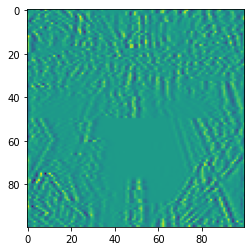

In [30]:
plt.imshow(broken_image.view(100,100)) 


In [32]:
def weird_function(x, n_iter = 5):
  h = x
  filt = torch.tensor([-1./3, 1./3, -1./3])
  for i in range(n_iter):
    zero_tensor = torch.tensor([1.0*0])
    h_l = torch.cat((zero_tensor, h[:-1]), 0)
    h_r = torch.cat((h[1:], zero_tensor), 0)
    h = filt[0]*h + filt[2]*h_l +filt[1]*h_r
    if i % 2 == 0:
      h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
  return h

In [33]:
def distance_loss(hypothesis, broken_image):
  return torch.dist(hypothesis, broken_image)


In [34]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [35]:
lr = 0.8

In [36]:
for i in range(0, 20000):
  random_tensor.requires_grad_(True)
  hypothesis = weird_function(random_tensor)
  loss = distance_loss(hypothesis, broken_image)
  loss.backward()

  with torch.no_grad():
    random_tensor = random_tensor - lr*random_tensor.grad
  if i % 1000 == 0:
    print('Loss at {} = {}'. format(i, loss.item()))

Loss at 0 = 12.02292251586914
Loss at 1000 = 1.0950708389282227
Loss at 2000 = 0.5325770974159241
Loss at 3000 = 0.38084402680397034
Loss at 4000 = 0.30580782890319824
Loss at 5000 = 0.257468044757843
Loss at 6000 = 0.22201725840568542
Loss at 7000 = 0.19379359483718872
Loss at 8000 = 0.16995538771152496
Loss at 9000 = 0.1489325910806656
Loss at 10000 = 0.12980693578720093
Loss at 11000 = 0.11201657354831696
Loss at 12000 = 0.09520231187343597
Loss at 13000 = 0.07912485301494598
Loss at 14000 = 0.0636184811592102
Loss at 15000 = 0.04856501892209053
Loss at 16000 = 0.03387928381562233
Loss at 17000 = 0.020067676901817322
Loss at 18000 = 0.02116371877491474
Loss at 19000 = 0.021166490390896797


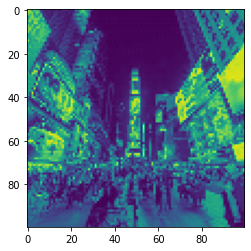

In [37]:
plt.imshow(random_tensor.view(100, 100).data)